# Steps
1. Import Training csv
2. Drop benign data
3. Setup autogluon
4. Train non persistent model
5. Test non persistent model
6. Check leaderboard
7. Check feature importance

# Imports

In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

c:\Users\zac\miniconda3\envs\navya\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Import Training data

<Axes: >

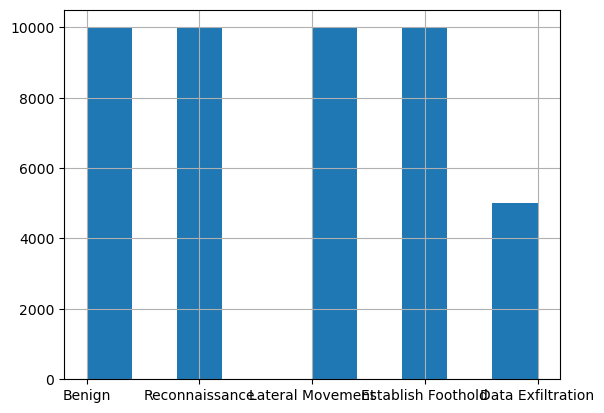

In [2]:
train_df = pd.read_csv("unraveled_training.csv")
train_df['Label'].hist()

# Drop benign labels

<Axes: >

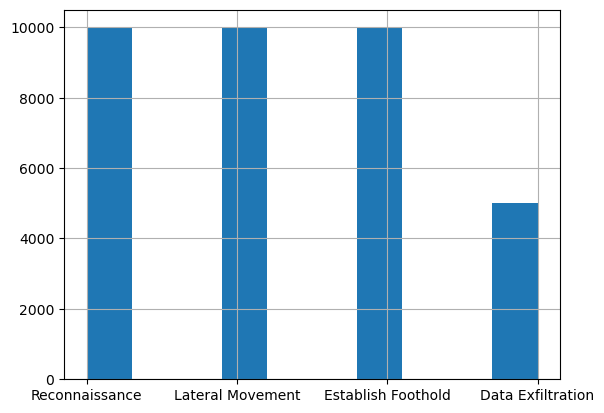

In [3]:
no_benign = train_df['Label'] != 'Benign'
train_df = train_df[no_benign]
train_df['Label'].hist()

# Setup Autogluon

In [14]:
predictor = TabularPredictor(label='Label', eval_metric= 'mcc').fit(train_df, fit_weighted_ensemble=False, time_limit=300)

No path specified. Models will be saved in: "AutogluonModels/ag-20250521_063540"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.12
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.4.0: Fri Apr 11 18:32:05 PDT 2025; root:xnu-11417.101.15~117/RELEASE_ARM64_T8132
CPU Count:          10
Memory Avail:       2.85 GB / 16.00 GB (17.8%)
Disk Space Avail:   156.10 GB / 460.43 GB (33.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize a

# Import Testing data

<Axes: >

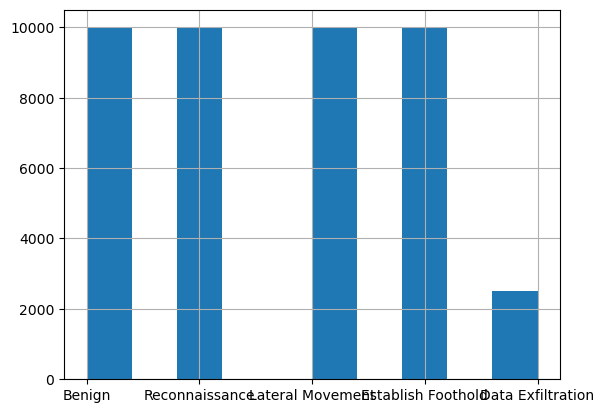

In [15]:
test_df = pd.read_csv('unraveled_testing.csv')
test_df['Label'].hist()

# Remove benign from test

<Axes: >

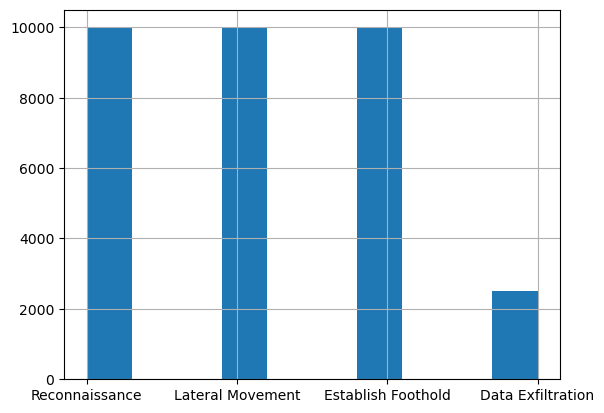

In [16]:
no_benign_mask = test_df['Label'] != 'Benign'
test_df = test_df[no_benign_mask]
test_df['Label'].hist()

In [17]:
predictor.leaderboard(test_df)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI,0.644229,0.672040,mcc,0.310907,0.018150,17.155120,0.310907,0.018150,17.155120,1,True,3
1,NeuralNetTorch,0.643768,0.676216,mcc,0.305533,0.024015,41.241421,0.305533,0.024015,41.241421,1,True,12
2,LightGBMXT,0.642345,0.671469,mcc,0.012438,0.001808,2.268808,0.012438,0.001808,2.268808,1,True,4
3,XGBoost,0.604603,0.639413,mcc,0.071861,0.002782,0.931708,0.071861,0.002782,0.931708,1,True,11
4,LightGBM,0.596717,0.645791,mcc,0.024382,0.002077,2.353455,0.024382,0.002077,2.353455,1,True,5
5,CatBoost,0.596554,0.632571,mcc,0.045352,0.002601,3.713725,0.045352,0.002601,3.713725,1,True,8
6,LightGBMLarge,0.547480,0.596090,mcc,0.083360,0.006303,9.505447,0.083360,0.006303,9.505447,1,True,13
7,KNeighborsUnif,0.485810,0.516094,mcc,0.546454,0.054819,0.022311,0.546454,0.054819,0.022311,1,True,1
8,RandomForestEntr,0.418216,0.435129,mcc,0.310437,0.038394,1.995736,0.310437,0.038394,1.995736,1,True,7
9,RandomForestGini,0.418091,0.431360,mcc,0.327812,0.049040,1.963605,0.327812,0.049040,1.963605,1,True,6


In [18]:
# will return the path to the cloned predictor, identical to save_path_clone_opt
path_clone_opt = predictor.clone_for_deployment(path='persistent_model')

Cloned TabularPredictor located in '/Users/navya/Documents/Uni/Repos/modular_ids_framework/AutogluonModels/ag-20250521_063540' to 'persistent_model'.
	To load the cloned predictor: predictor_clone = TabularPredictor.load(path="persistent_model")
Clone: Keeping minimum set of models required to predict with best model 'NeuralNetTorch'...
Deleting model KNeighborsUnif. All files under /Users/navya/Documents/Uni/Repos/modular_ids_framework/persistent_model/models/KNeighborsUnif will be removed.
Deleting model KNeighborsDist. All files under /Users/navya/Documents/Uni/Repos/modular_ids_framework/persistent_model/models/KNeighborsDist will be removed.
Deleting model NeuralNetFastAI. All files under /Users/navya/Documents/Uni/Repos/modular_ids_framework/persistent_model/models/NeuralNetFastAI will be removed.
Deleting model LightGBMXT. All files under /Users/navya/Documents/Uni/Repos/modular_ids_framework/persistent_model/models/LightGBMXT will be removed.
Deleting model LightGBM. All files 